In [1]:
pwd


'C:\\Users\\OWNER\\Downloads\\Gluco_Track\\SDS-CP035-gluco-track\\beginner\\submissions\\team-members\\Shamsudeen-Bankole'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve


In [3]:
pd.set_option('display.max_columns', None) # To show the full columns in the dataframe

In [4]:
diab_data = pd.read_csv("Dataset/diabetes_binary_health_indicators_BRFSS2015.csv")

# EDA


In [5]:
diab_data.shape

(253680, 22)

In [6]:
diab_data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [7]:
diab_data.tail()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0
253679,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


In [8]:
# Rename the target column
diab_data.rename(columns={"Diabetes_binary": "Outcome"}, inplace=True)
diab_data


,Outcome,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [9]:
print(diab_data.columns.tolist())


['Outcome', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


In [10]:
# check for missing values
diab_data.isnull().sum()


Outcome                 0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [11]:
# Check for duplicates in the dataset
diab_data[diab_data.duplicated()]
# diab_data.loc[diab_data.duplicated()] 


,Outcome,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,1.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0
1563,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
2700,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
3160,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
3332,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253492,1.0,1.0,1.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,6.0,6.0
253550,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0
253563,0.0,0.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,8.0
253597,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0


In [12]:
diab_data.dtypes # Incorrectly formatted features as float64, BMI is correct as float, other features are not


Outcome                 float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [13]:
# Identify the columns which should be categorical or numeric
binary_features = []
ordinal_features = []
numeric_features = [] 

for col in diab_data.columns:
    unique_vals = diab_data[col].nunique()
    unique_list = sorted(diab_data[col].unique())

    if unique_vals == 2 and set (unique_list)== {0.0, 1.0}:
        binary_features.append(col)
    elif unique_vals <= 13 and all(isinstance(x, (int, float)) and x == int(x) for x in unique_list):
        ordinal_features.append(col)
    else:
        numeric_features.append(col)
print(f"binary_features (0/1): {binary_features}")
print(f"ordinal_features: {ordinal_features}")
print(f"numeric_features: {numeric_features}")  


binary_features (0/1): ['Outcome', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
ordinal_features: ['GenHlth', 'Age', 'Education', 'Income']
numeric_features: ['BMI', 'MentHlth', 'PhysHlth']


In [14]:
# Check for constant or near constant features
print ("Variance analysis for constant/ near-constant features:")
print ("-"*60)
variance_analysis = []
for col in diab_data.columns:
    unique_vals = diab_data[col].nunique()
    most_common_pct = diab_data[col].value_counts().iloc[0]/len(diab_data)*100
    variance = diab_data[col].var()
    variance_analysis.append({"column": col, "unique_values":unique_vals, "most_common_pct": most_common_pct, "variance":variance})
variance_df = pd.DataFrame(variance_analysis)
variance_df= variance_df.sort_values("most_common_pct", ascending = False)
print ("Features sorted by dominance most common value")
variance_df_display = variance_df.round(2)
print(variance_df_display)


Variance analysis for constant/ near-constant features:
------------------------------------------------------------
Features sorted by dominance most common value
                  column  unique_values  most_common_pct  variance
3              CholCheck              2            96.27      0.04
6                 Stroke              2            95.94      0.04
12         AnyHealthcare              2            95.11      0.05
11     HvyAlcoholConsump              2            94.38      0.05
13           NoDocbcCost              2            91.58      0.08
7   HeartDiseaseorAttack              2            90.58      0.09
0                Outcome              2            86.07      0.12
17              DiffWalk              2            83.18      0.14
10               Veggies              2            81.14      0.15
8           PhysActivity              2            75.65      0.18
15              MentHlth             31            69.25     54.95
9                 Fruits        

In [15]:
# Identify near-constant features (>95% same value)
near_constant = variance_df[variance_df["most_common_pct"]>95]
print(f"\
Near_constant features (>95% same value):")
print(near_constant [["column", "most_common_pct"]].round(2))


Near_constant features (>95% same value):
           column  most_common_pct
3       CholCheck            96.27
6          Stroke            95.94
12  AnyHealthcare            95.11


In [16]:
### Target Class Distribution
diab_data["Outcome"].value_counts()


Outcome
0.0    218334
1.0     35346
Name: count, dtype: int64

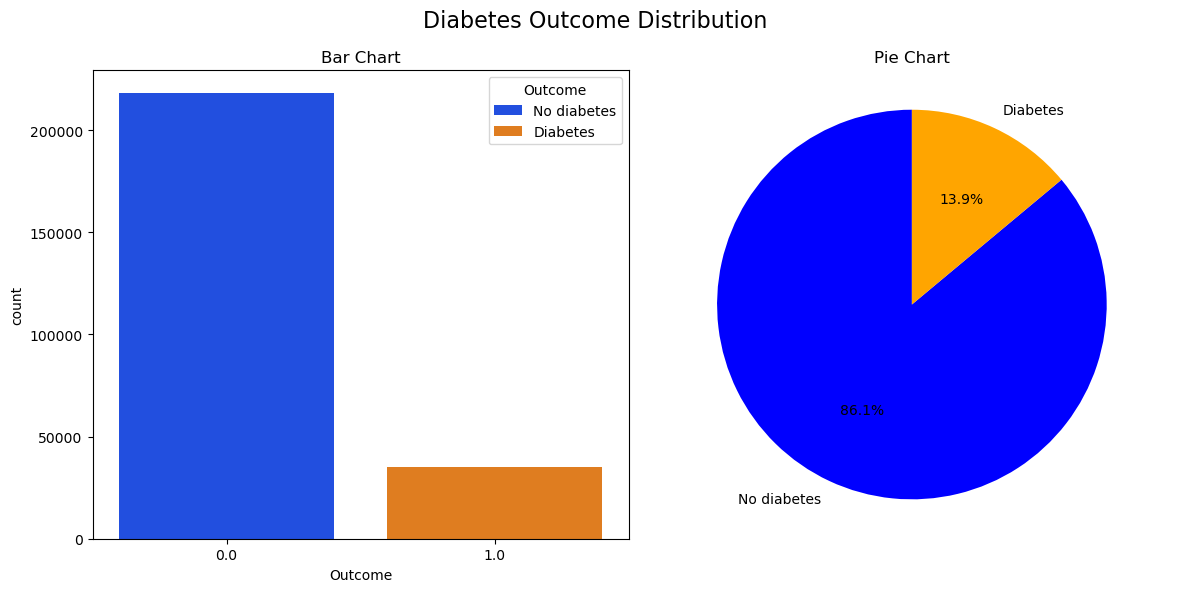

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count and percentage
counts = diab_data['Outcome'].value_counts()
outcome_percent = round(counts / counts.sum() * 100, 1)

# Define legend labels
legend_labels = {0: 'No diabetes', 1: 'Diabetes'}
legend_labels_list = [legend_labels[i] for i in sorted(legend_labels.keys())]

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Bar chart
sns.countplot(
    data=diab_data,
    x='Outcome',
    hue='Outcome',
    palette='bright',
    dodge=False,
    ax=axes[0]
)
axes[0].set_title('Bar Chart')

# Replace legend numbers with text
axes[0].legend(legend_labels_list, title="Outcome")

# Pie chart
axes[1].pie(
    counts,
    labels=legend_labels_list,
    colors=['blue', 'orange'],
    autopct='%1.1f%%',
    startangle=90
)
axes[1].axis('equal')
axes[1].set_title('Pie Chart')

# Overall title
plt.suptitle('Diabetes Outcome Distribution', fontsize=16)
plt.tight_layout()
plt.show()


In [21]:
print("Loaded dataset and starting numeric feature analysis...")
# Identify numeric columns with more than 10 unique values (exclude binaries)
numeric_rich = [c for c in diab_data.columns if pd.api.types.is_numeric_dtype(diab_data[c]) and diab_data[c].nunique() > 15]
print("Numeric features with meaningful distributions:")
print(numeric_rich)

Loaded dataset and starting numeric feature analysis...
Numeric features with meaningful distributions:
['BMI', 'MentHlth', 'PhysHlth']


In [22]:
## Compute distribution stats, skewness, and outliers via IQR
rows = []
for col in numeric_rich:
    s = diab_data[col].dropna()
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = ((s < lower) | (s > upper)).sum()
    skew = s.skew()
    kurt = s.kurtosis()
    rows.append({
        'feature': col,
        'min': s.min(),
        'q1': q1,
        'median': s.median(),
        'mean': s.mean(),
        'q3': q3,
        'max': s.max(),
        'std': s.std(),
        'skew': skew,
        'kurtosis': kurt,
        'iqr': iqr,
        'lower_bound': lower,
        'upper_bound': upper,
        'outlier_count': outliers,
        'outlier_pct': outliers / len(s) * 100
    })

summary = pd.DataFrame(rows)
summary_round = summary.copy()
summary_round[['min','q1','median','mean','q3','max','std','skew','kurtosis','iqr','lower_bound','upper_bound','outlier_pct']] = \
    summary_round[['min','q1','median','mean','q3','max','std','skew','kurtosis','iqr','lower_bound','upper_bound','outlier_pct']].round(2)
print("\
Distribution, skewness, and outlier summary:")
print(summary_round[['feature','min','q1','median','mean','q3','max','skew','kurtosis','outlier_count','outlier_pct']])



Distribution, skewness, and outlier summary:
    feature   min    q1  median   mean    q3   max  skew  kurtosis  \
0       BMI  12.0  24.0    27.0  28.38  31.0  98.0  2.12     11.00   
1  MentHlth   0.0   0.0     0.0   3.18   2.0  30.0  2.72      6.44   
2  PhysHlth   0.0   0.0     0.0   4.24   3.0  30.0  2.21      3.50   

   outlier_count  outlier_pct  
0           9847         3.88  
1          36208        14.27  
2          40949        16.14  


In [ ]:
# Domain-based unrealistic value checks
issues = []
# MentHlth and PhysHlth should be 0-30 days
for col in ['MentHlth','PhysHlth']:
    if col in diab_data.columns:
        below0 = (diab_data[col] < 0).sum()
        above30 = (diab_data[col] > 30).sum()
        issues.append({'feature': col, 'below_0': int(below0), 'above_30': int(above30)})


In [ ]:
# BMI plausible rough bounds [10, 80] (very conservative)
if 'BMI' in diab_data.columns:
    bmi_below10 = (diab_data['BMI'] < 10).sum()
    bmi_above80 = (diab_data['BMI'] > 80).sum()
    issues.append({'feature': 'BMI', 'below_0': int((diab_data['BMI'] < 0).sum()), 'below_10': int(bmi_below10), 'above_80': int(bmi_above80)})

issues_df = pd.DataFrame(issues)
print("\
Unrealistic or problematic value checks:")
print(issues_df)


In [ ]:
# Visualizations: Histograms and Boxplots for the main continuous/count features
plot_cols = [c for c in ['BMI','MentHlth','PhysHlth'] if c in diab_data.columns]

for col in plot_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(diab_data[col], bins=30, kde=True, color='steelblue')
    plt.title('Histogram of ' + col)
    plt.tight_layout()
    plt.show()

for col in plot_cols:
    plt.figure(figsize=(6,2.5))
    sns.boxplot(x=diab_data[col], color='coral')
    plt.title('Boxplot of ' + col)
    plt.tight_layout()
    plt.show()

print("Generated summary tables and plots for BMI, MentHlth, and PhysHlth.")


In [ ]:
# Visualizations: Bar plots for key categorical features vs diabetes rate
#plot_features = ['GenHlth','PhysActivity','HighBP','HighChol','Income']
features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex', 'GenHlth', 'Age', 'Education', 'Income']
for feat in features:
    plt.figure(figsize=(6,4))
    rates = diab_data.groupby(feat)['Outcome'].mean().reset_index()
    rates['DiabetesRate_pct'] = rates['Outcome'] * 100
    sns.barplot(data=rates, x=feat, y='DiabetesRate_pct', palette='viridis')
    plt.ylabel('Diabetes rate (%)')
    plt.title('Diabetes rate by ' + str(feat))
    plt.tight_layout()
    plt.show()

print("Generated bar plots for categorical features vs diabetes rate.")

In [ ]:
#corr_matrix = diab_data[["BMI", "MentHlth", "PhysHlth", "Income", "Age", "Education", "GenHlth"]].corr(method = "pearson")
corr_matrix = diab_data[["BMI", "MentHlth", "PhysHlth", "Outcome"]].corr(method = "pearson")         
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


### Convert into appropriate datatype


In [ ]:
binary_features : ['Outcome', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
ordinal_features: ['GenHlth', 'Age', 'Education', 'Income']
numeric_features: ['BMI', 'MentHlth', 'PhysHlth']

### Check for skewness
> +1 or < -1 → highly skewed
Between ±0.5 and ±1 → moderately skewed
Between -0.5 and +0.5 → approximately symmetric


In [ ]:
diab_data.describe()

### Feature Distributions

In [ ]:
numeric_cols = diab_data.select_dtypes(include=['int', 'float']).columns.drop('Outcome')
for col in numeric_cols:
    sns.histplot(data=diab_data, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

## Categorical Feature Frequencies

In [ ]:
cat_cols = diab_data.select_dtypes(include='category').columns

for col in cat_cols:
    diab_data[col].value_counts().plot(kind='bar')
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
# Point-Biserial Correlation (for binary vs continuous)

from scipy.stats import pointbiserialr

for col in diab_data.select_dtypes(include=['int', 'float']).columns:
    if col != 'Outcome':
        r, p = pointbiserialr(diab_data['Outcome'], diab_data[col])
        print(f"{col}: r = {r:.3f}, p = {p:.3f}")

In [ ]:
# Cramér’s V (for categorical vs categorical)
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

for col in diab_data.select_dtypes(include='category').columns:
    v = cramers_v(diab_data[col], diab_data['Outcome'])
    print(f"{col}: Cramér’s V = {v:.3f}")

### Identifying predictive numerical features

In [ ]:
corr_matrix = diab_data[['BMI', 'MentHlth', 'PhysHlth', 'Outcome']].corr()
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Ensure no categorical variables (encode them if needed)
X = diab_data.drop(columns=['Outcome'])  # exclude target
X = add_constant(X)

# Calculate VIF
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = vif.sort_values(by="VIF", ascending=False)
print(vif)

### Identifying predictive categorical features

In [ ]:
# Set up plotting style
sns.set(style='whitegrid')

# Loop through each categorical column and plot
for col in cat_features:
    plt.figure(figsize=(6, 4))
    
    # Plot average proportion of diabetes by category
    sns.barplot(
        x=col, 
        y='Outcome', 
        data=diab_data, 
        estimator=lambda x: sum(x) / len(x),
        palette='coolwarm'
    )
    
    plt.title(f"Proportion of Diabetes Cases by {col}", fontsize=12)
    plt.ylabel("Proportion with Diabetes")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
HighBP, HighChol, CholCheck, Smoking, Stroke, HeartDiseaseorattack, AnyHealthCare, NoDocscCost, GenHealth, DiffWalk, Sex

HighBP, Age, Sex, DiffWalk, GenHlth, NoDocbcCost, AnyHealthcare, HvyAlcoholConsump Veggies, Fruits, PhysActivity, HeartDiseaseorAttack, Stroke, Smoker, CholCheck, HighChol, Education, Income    

In [ ]:
from scipy.stats import chi2_contingency
# Replace this with your actual DataFrame name if different
df = diab_data.copy()
# Store results
chi2_results = []

for feature in cat_features:
    contingency_table = pd.crosstab(df[feature], df[target])
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    chi2_results.append({
        'Feature': feature,
        'Chi2 Stat': round(chi2_stat, 2),
        'p-value': round(p_value, 5),
        'Significant (p < 0.05)': p_value < 0.05
    })

# Display as a DataFrame
chi2_df = pd.DataFrame(chi2_results)
print(chi2_df.sort_values(by='p-value'))

## Data Pre-processing

In [ ]:
#features_column = diab_data.iloc[:, 1:]
#features_column
